# EDA 

The objective of this project is to build models to predict the price of car as a function of features that define a car and and to study how the variation of the different features affect the price of the car

The purpose of this notebook is to conduct EDA to generate information for modeling

Table of Contents

[c.1 Feature Comparisons for brands](#c.1)

[c.2 Boxplots](#c.2)

[c.3 Pairplots](#c.3)

[c.4 Heatmaps](#c.4)

[c.5 Feature Engineering](#c.5)

[c.6 Brand Segmentation](#c.6)

In [44]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy import stats


In [45]:
%store -r categorical_columns
%store -r numerical_columns
%store -r car_data

<a id="c.1"></a>
## c.1 Feature Comparisons for brands

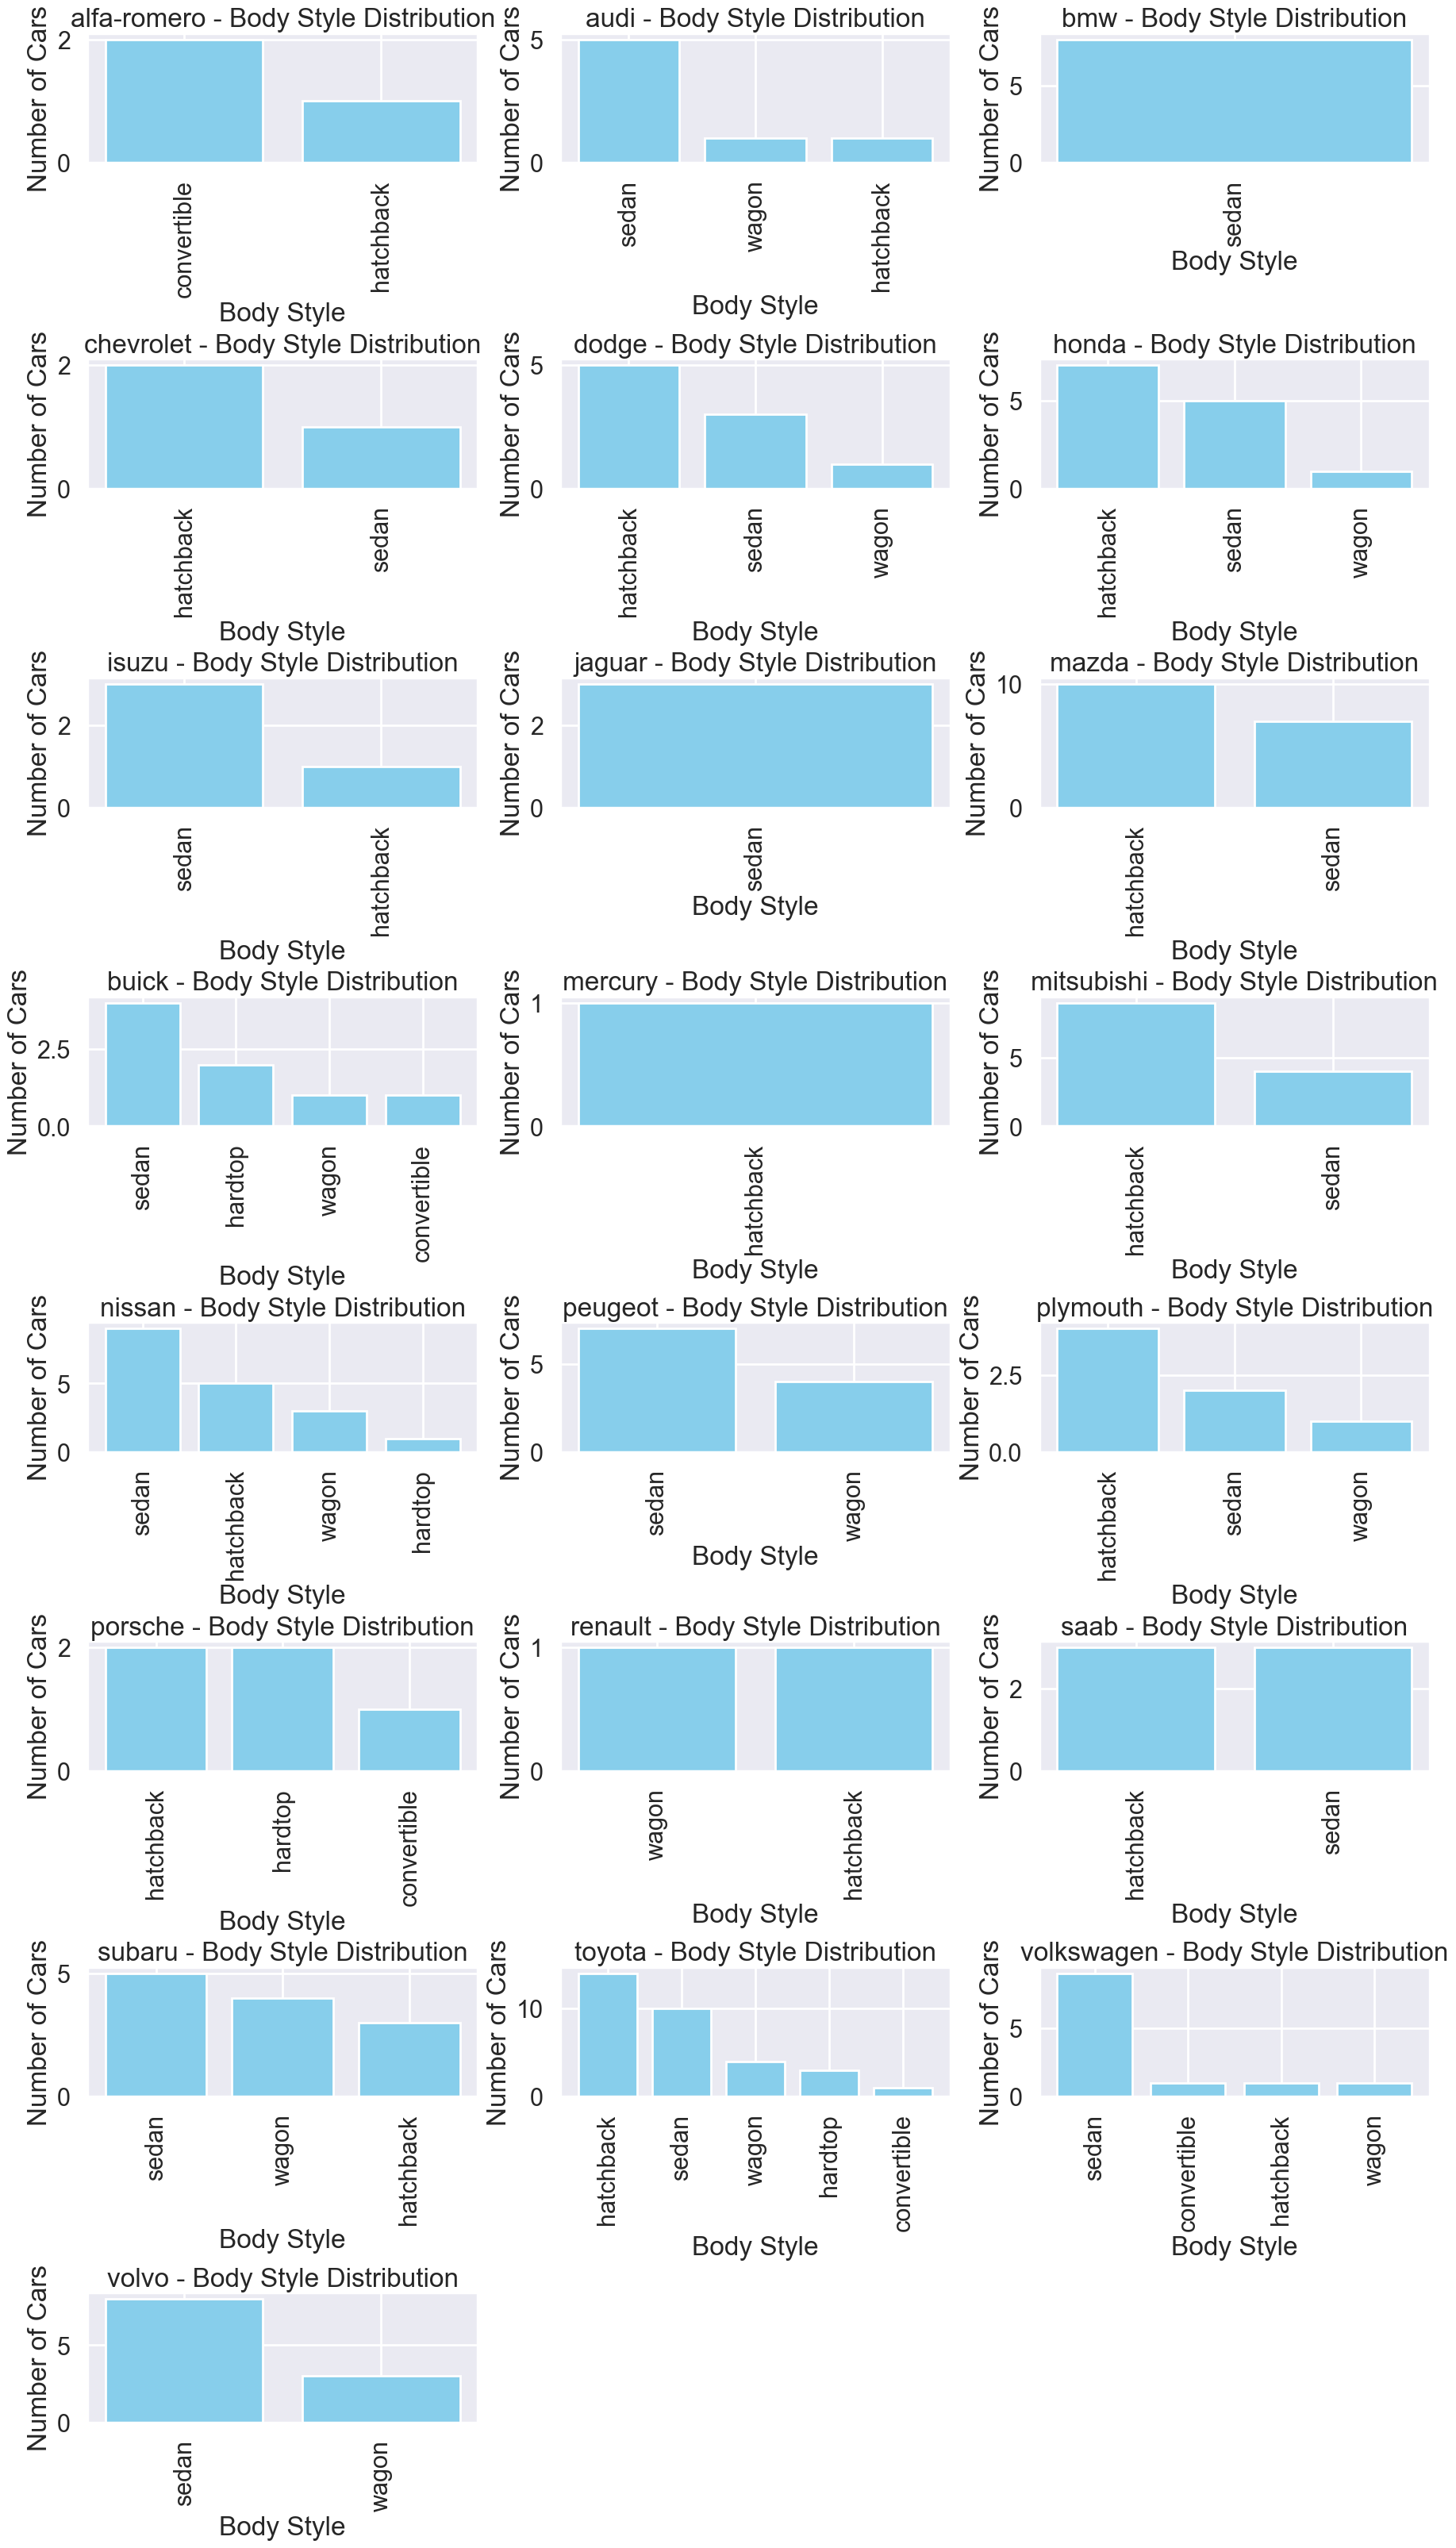

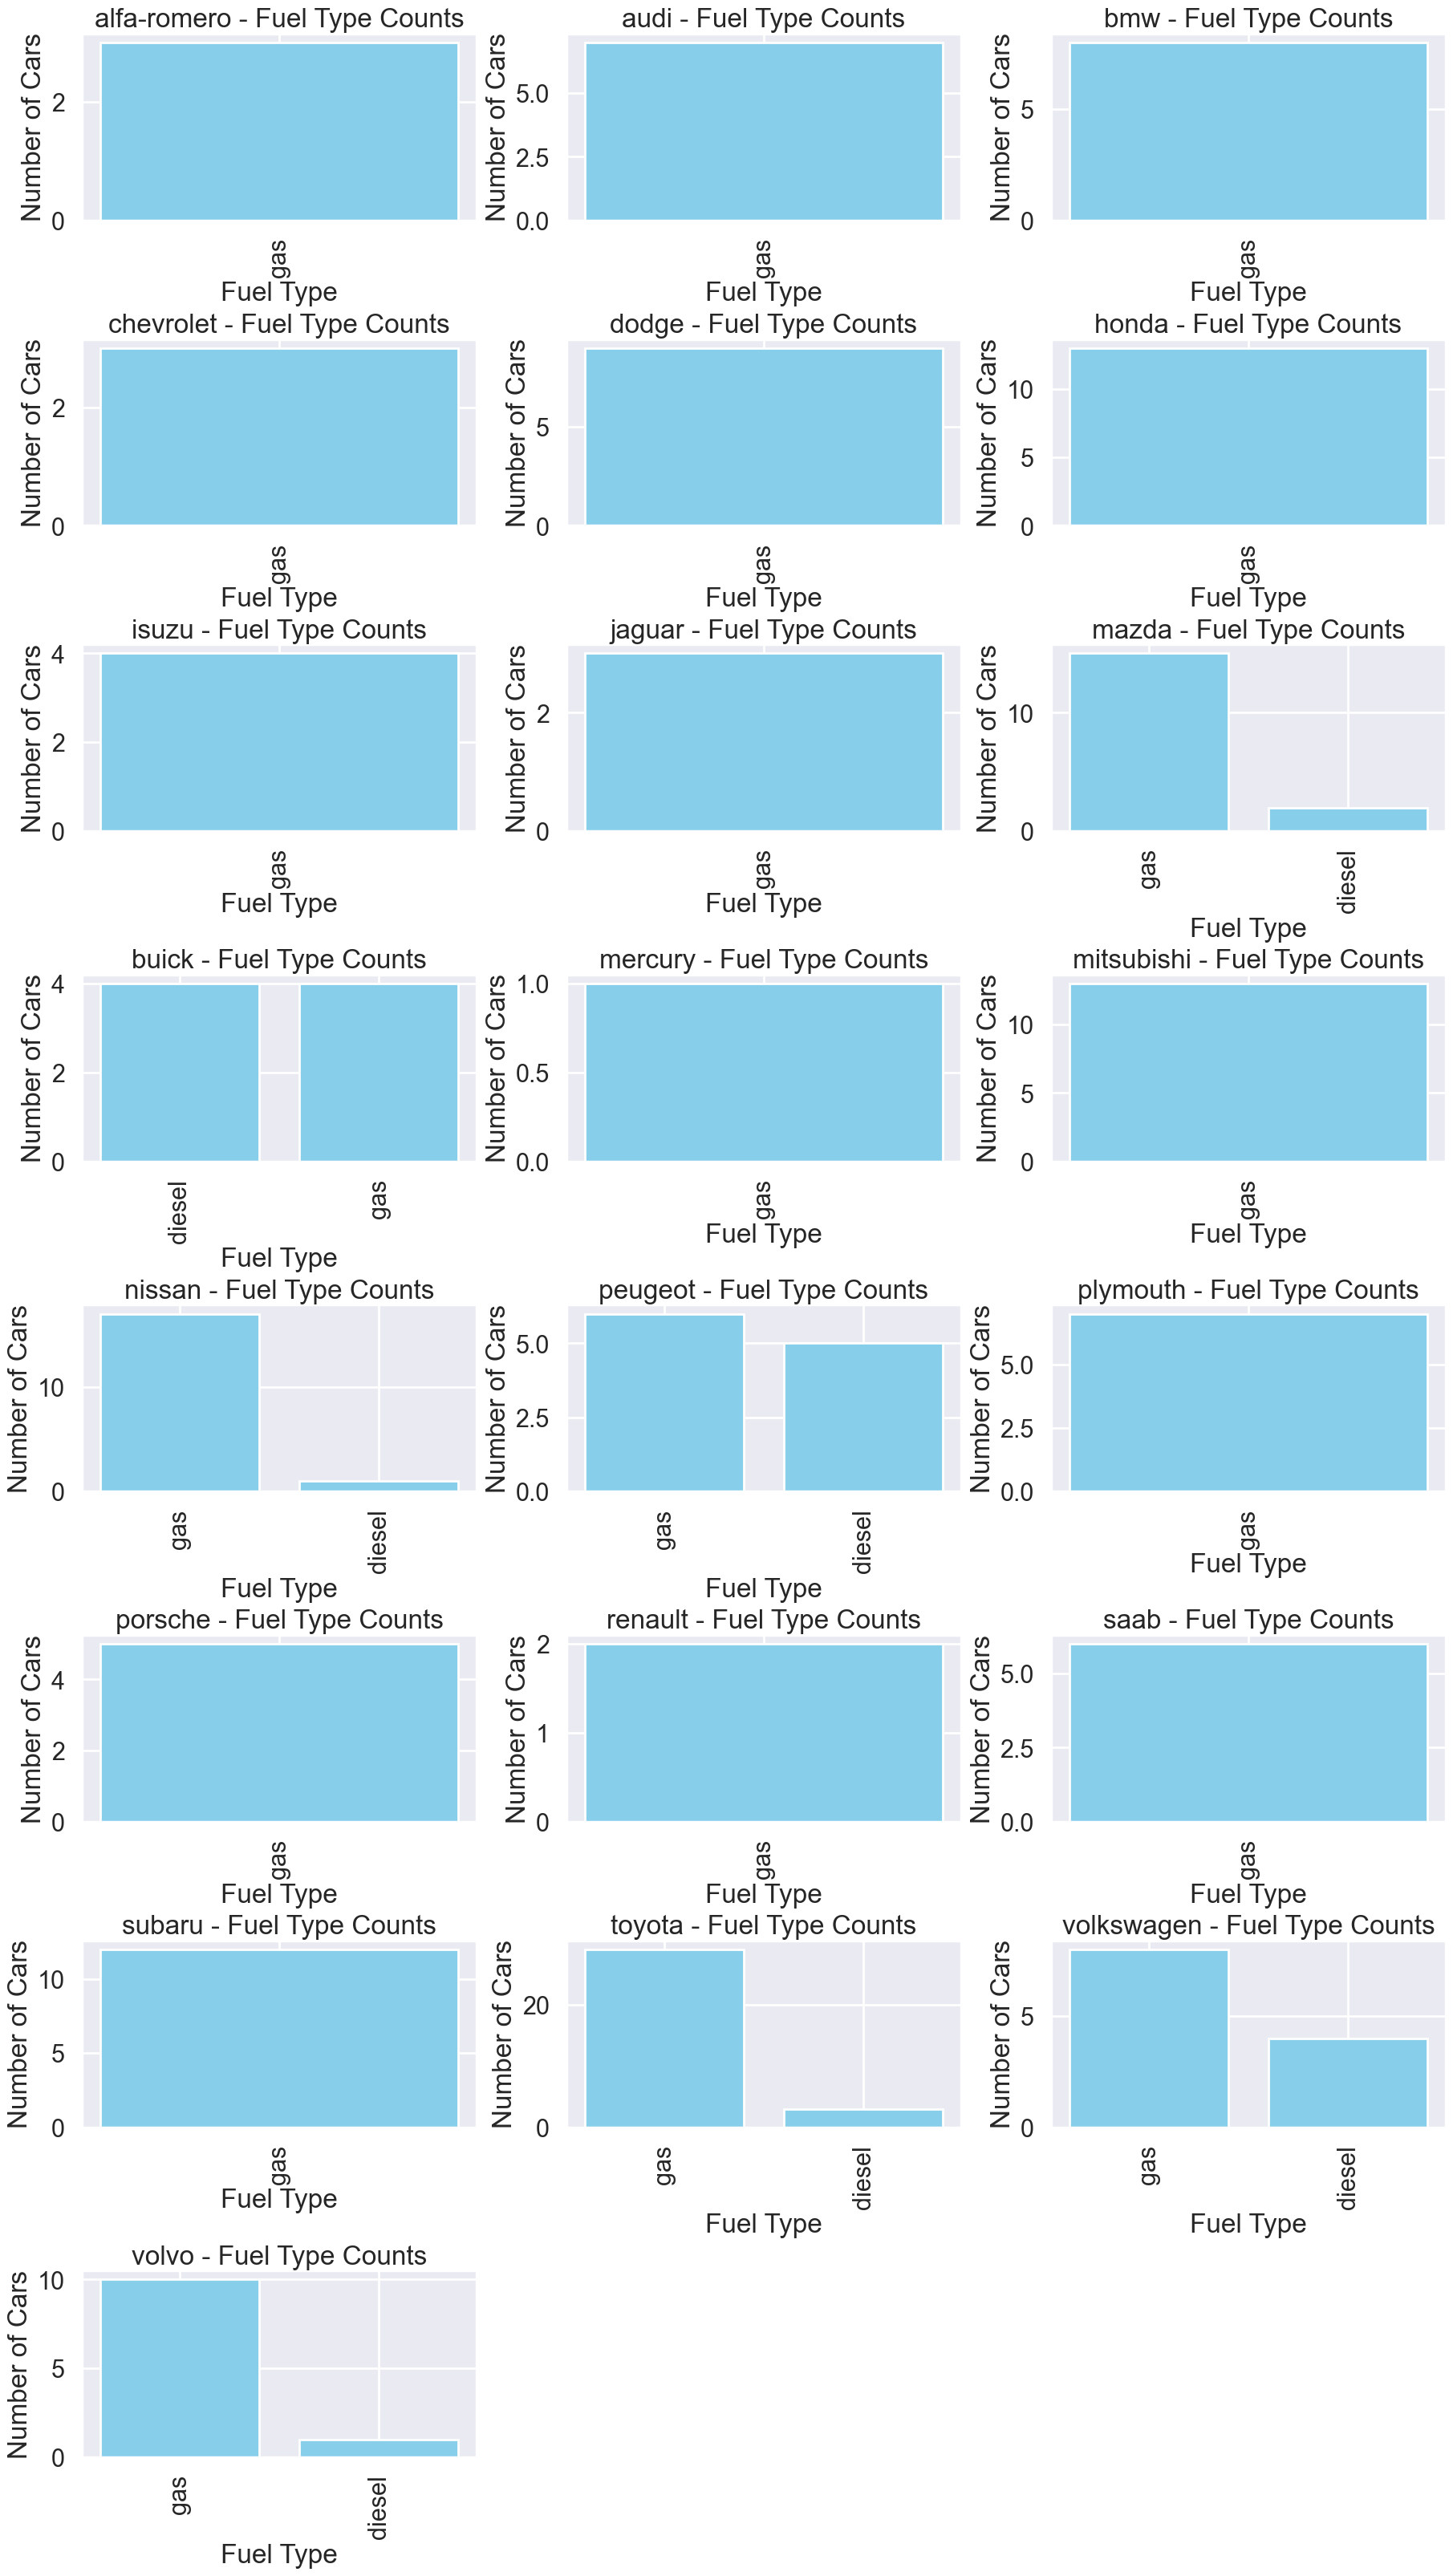

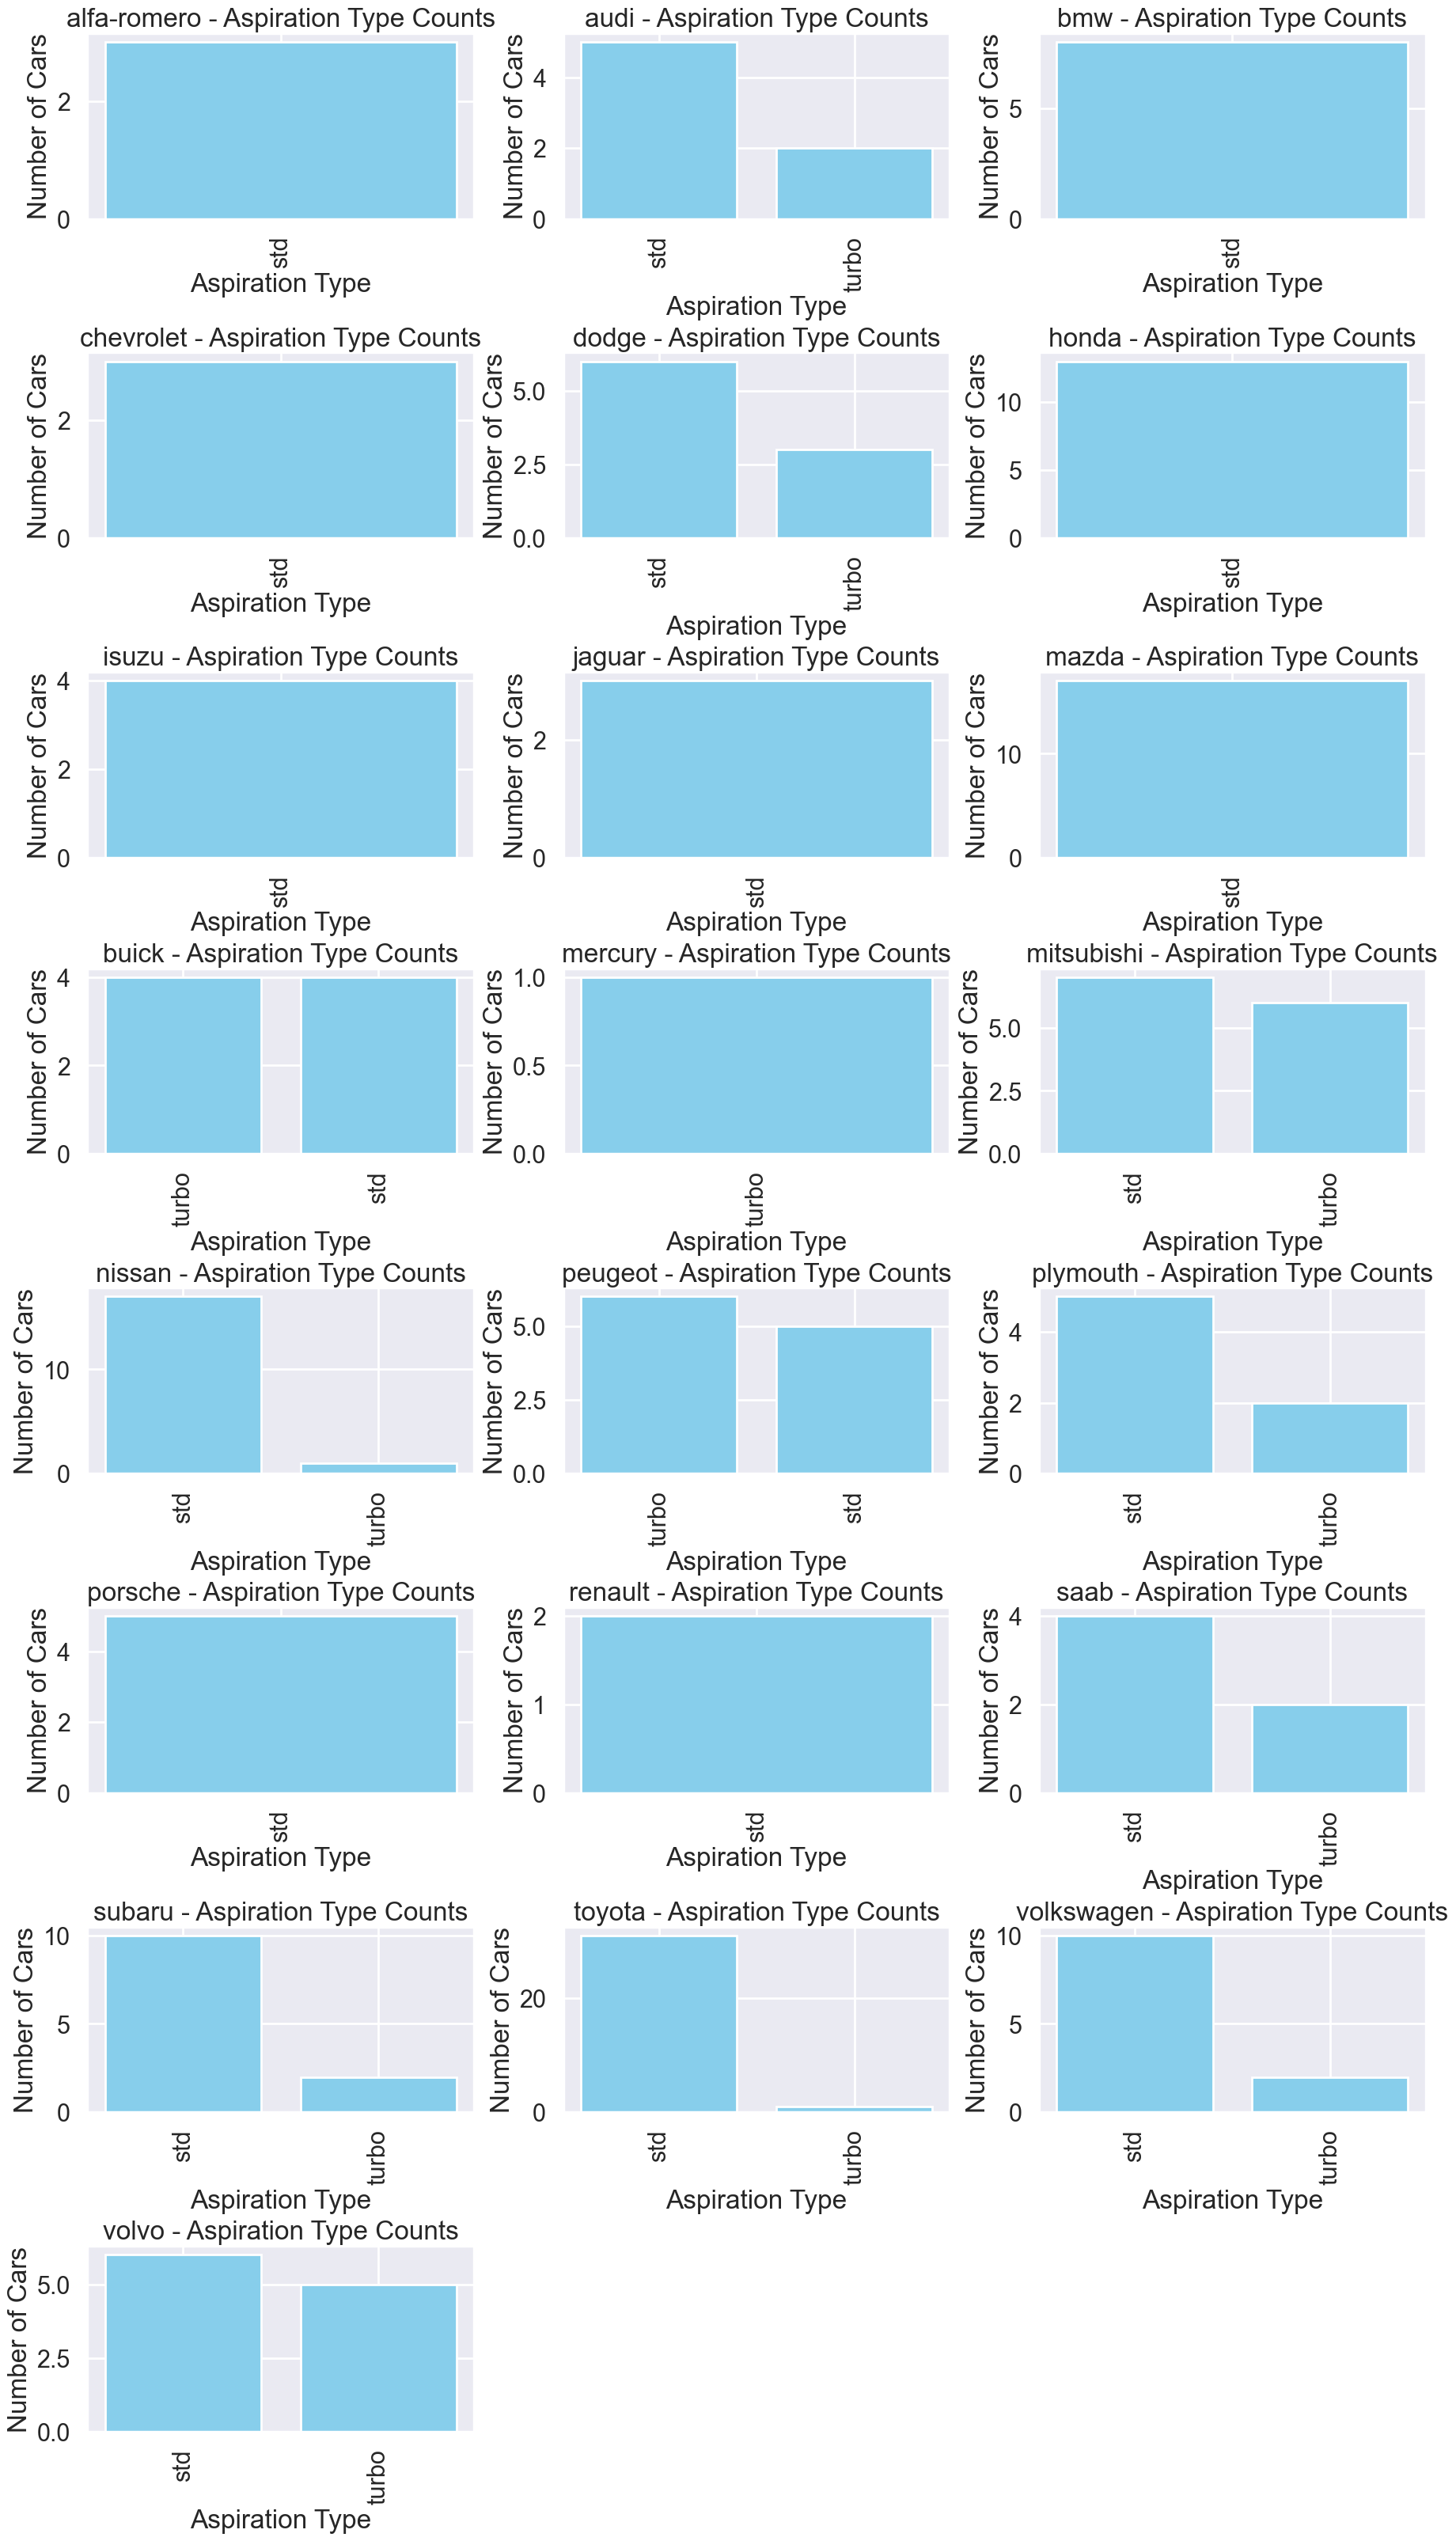

In [46]:
# Getting unique brands
unique_brands = car_data['CompanyName'].unique()


# Initialize dictionaries to hold the summary stats and counts for each brand
brand_summaries = {}
brand_body_style_counts = {}
brand_fuel_type_counts = {}
brand_aspiration_type_counts = {}

for brand in unique_brands:
    # Filter the data for the current brand
    brand_cars = car_data[car_data['CompanyName'] == brand]

    # Calculate and store count of different body styles
    brand_body_style_counts[brand] = brand_cars['carbody'].value_counts()

    # Calculate and store count of different fuel types
    brand_fuel_type_counts[brand] = brand_cars['fueltype'].value_counts()

    # Calculate and store count of different aspiration types
    brand_aspiration_type_counts[brand] = brand_cars['aspiration'].value_counts()

# Function to plot individual bar charts for each brand
def plot_individual_distribution(data_dict, title, x_label, y_label):
    # Determine number of rows needed for subplots based on number of brands
    num_brands = len(data_dict)
    cols = 3
    rows = num_brands // cols + (num_brands % cols > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 4*rows), constrained_layout=True)
    axes = axes.flatten()  # Flatten in case of a single row of plots

    for i, (brand, counts) in enumerate(data_dict.items()):
        axes[i].bar(counts.index, counts, color='skyblue')
        axes[i].set_title(f'{brand} - {title}')
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_label)
        axes[i].tick_params(axis='x', rotation=90)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.show()

# Plotting Individual Body Style Distribution for each brand
plot_individual_distribution(brand_body_style_counts, 'Body Style Distribution', 'Body Style', 'Number of Cars')

# Plotting Individual Fuel Type Counts for each brand
plot_individual_distribution(brand_fuel_type_counts, 'Fuel Type Counts', 'Fuel Type', 'Number of Cars')

# Plotting Individual Aspiration Type Counts for each brand
plot_individual_distribution(brand_aspiration_type_counts, 'Aspiration Type Counts', 'Aspiration Type', 'Number of Cars')

Luxury & Performance

BMW: Exclusive focus on luxury sedans with standard engines.
Jaguar: Luxury sedans with a focus on performance and comfort.
Porsche: Luxury and sports-oriented vehicles, mostly with standard engines.
Volvo: Known for safety and luxury with a balanced mix of sedans and wagons.

Practical & Versatile

Honda: Variety of practical hatchbacks and sedans, all with standard engines.
Toyota: Wide variety of models, predominantly standard engines, catering to a broad market.
Nissan: Offers a broad range of practical vehicles, including sedans and hatchbacks.
Subaru: Known for versatility and all-wheel drive offerings with a focus on practicality.

Sporty & Compact

Alfa-Romero: Focus on sporty convertibles and hatchbacks.
Chevrolet: Compact and affordable range, including hatchbacks.
Mercury: A single sporty hatchback model.
Mitsubishi: Sporty hatchbacks and practical sedans with a mix of engine types.

Diverse Offerings

Audi: Range of sedans, wagons, and hatchbacks with a balance of luxury and performance.
Buick: Diverse luxury offerings, balanced between engine and fuel types.
Dodge: A mix of body styles and engine types, offering both practical and performance vehicles.
Mazda: Sporty and practical mix with a variety of body styles.
Peugeot: Practical focus with a mix of sedans and wagons, balanced engine types.
Plymouth: Versatile range with a mix of standard and turbo engines.
Renault: Compact and practical, focusing on smaller vehicle types.
Saab: Balance of sporty and practical vehicles, with a mix of engine types.
Volkswagen: Known for a variety of vehicles, including iconic models, with a balance of engine types.

<a id="c.2"></a>
## c.2 Boxplots

The purpose of making box plots of the numerical data column is to show the range, outliers, skewness, and the comparisons across features.

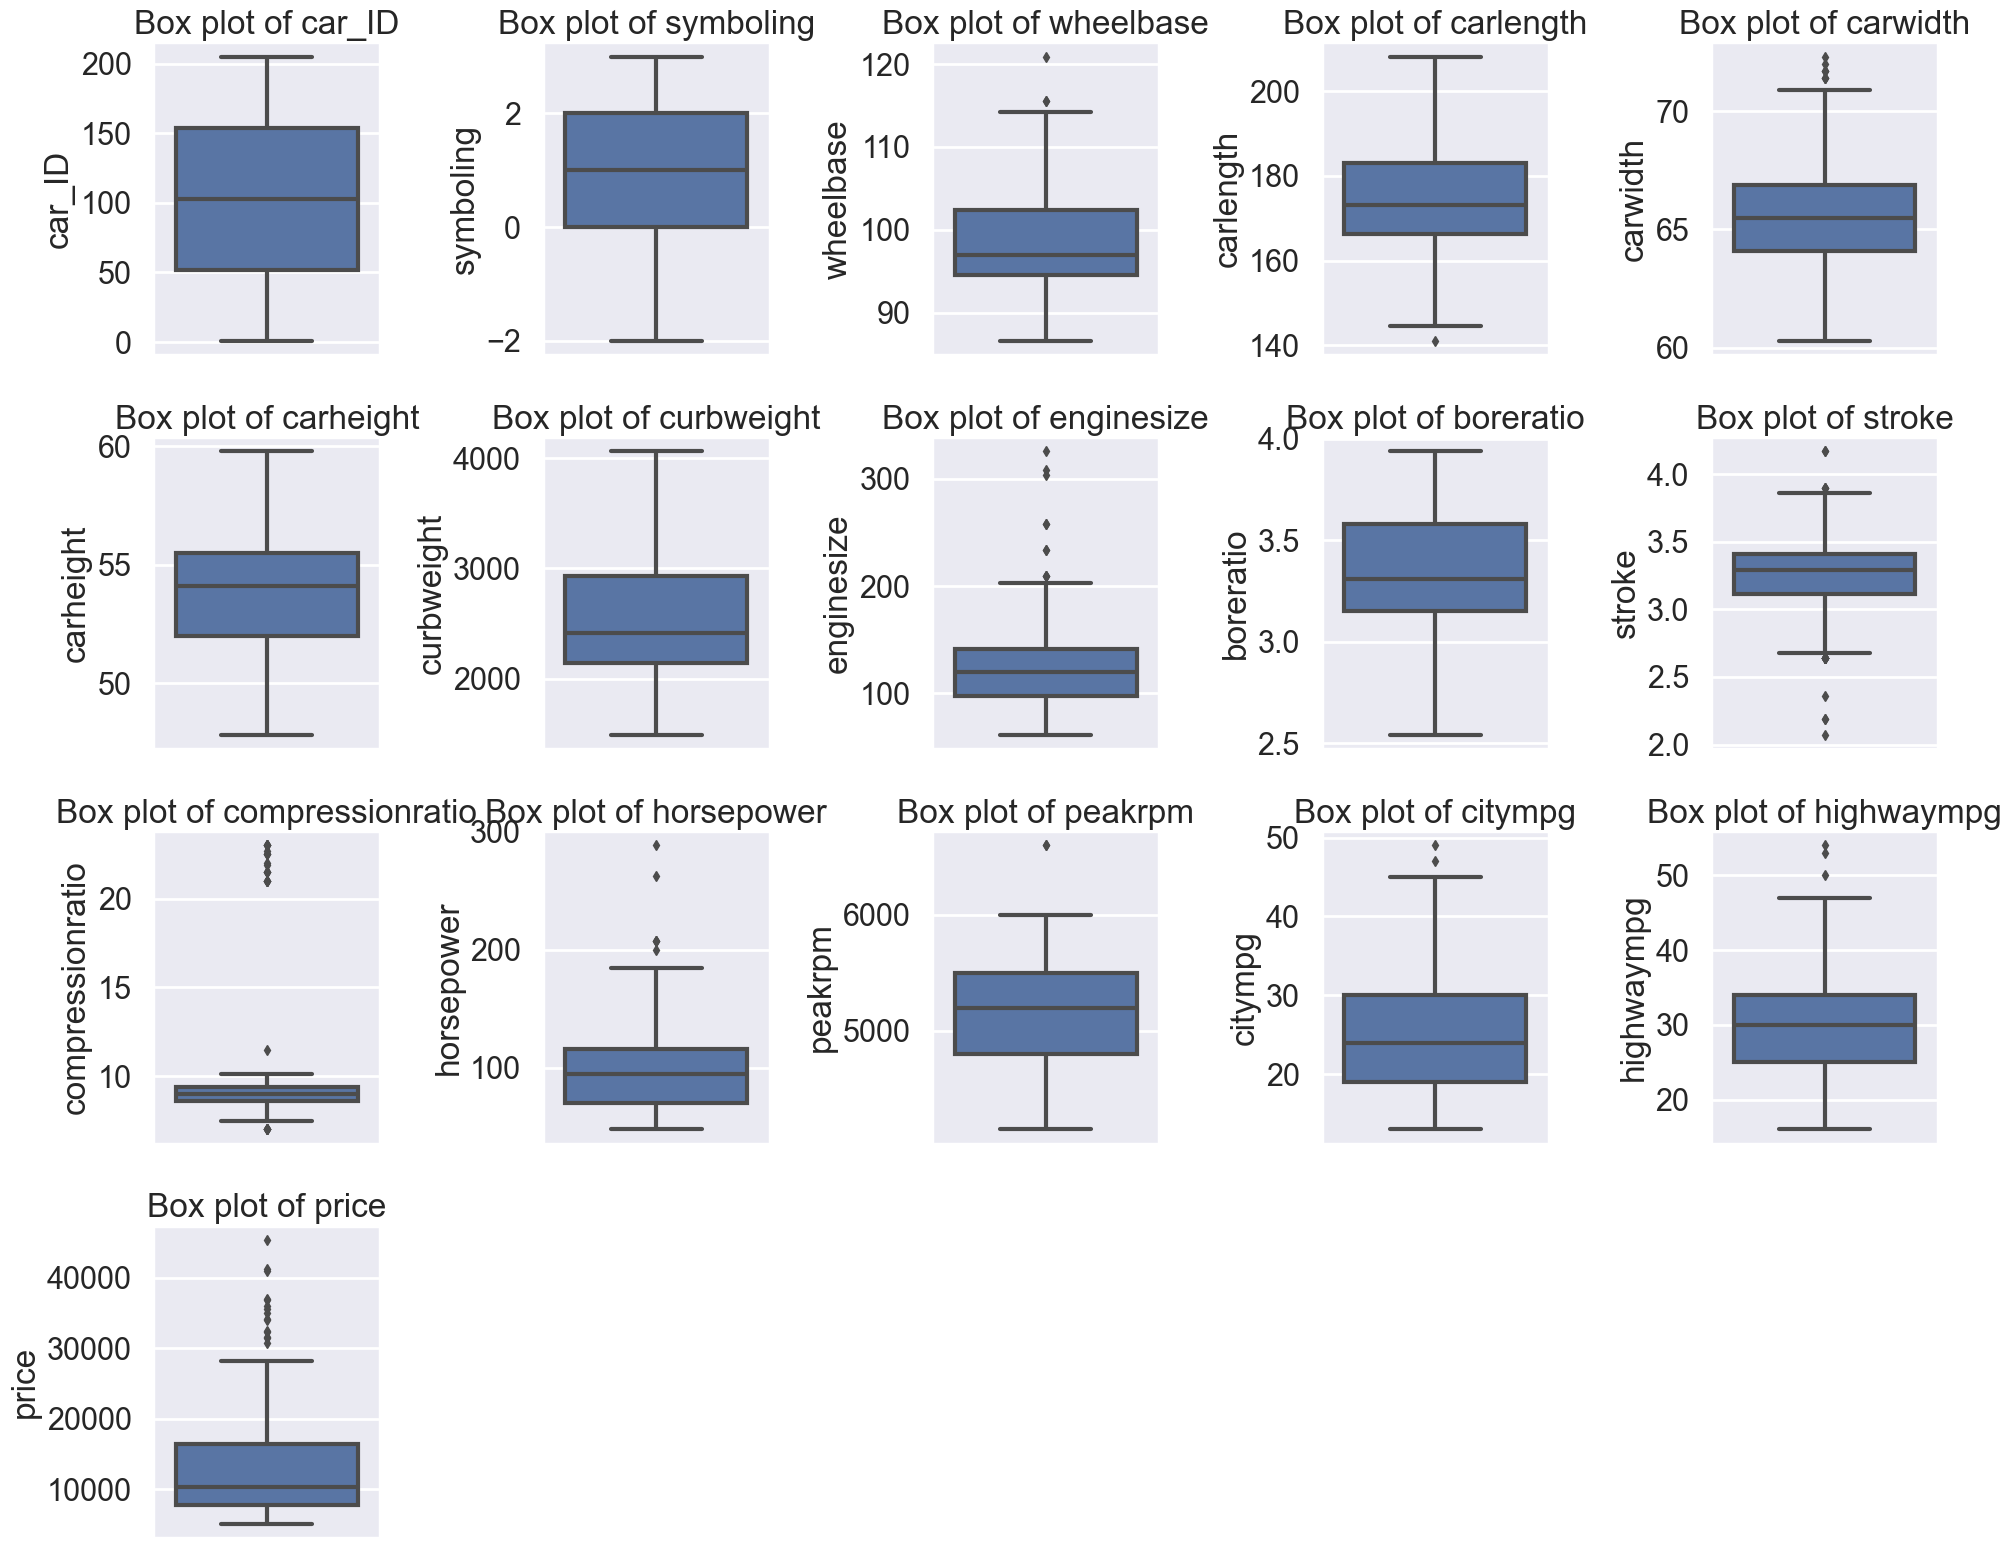

In [47]:
# Set up a 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16)) # Adjust figure size as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=car_data[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_ylabel(column)

# If there are more subplots than variables, remove the empty plots
for ax in axes[i+1:]:
    ax.remove()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Spread and Range Carwidth, carheight, and wheelbase appear to have a relatively moderate spread, indicating less variability in these dimensions among different cars. In contrast, variables like curbweight, horsepower, and price exhibit wider spreads, indicating more variability. Outliers Compressionratio exhibits a significant number of outliers, indicating some cars have unusually high or low compression ratios. horsepower and price also show several outliers, suggesting some high-performance or luxury cars significantly differ from the general population. citympg and highwaympg show outliers, likely indicating exceptionally efficient or inefficient vehicles. Skewness Some variables, like price and horsepower, exhibit right skewness (longer whisker on the right side), indicating the presence of high-value outliers. This might be typical in data where a few items (like luxury cars) are much more expensive or powerful than the majority.

<a id="c.3"></a>
## c.3 Pairplots

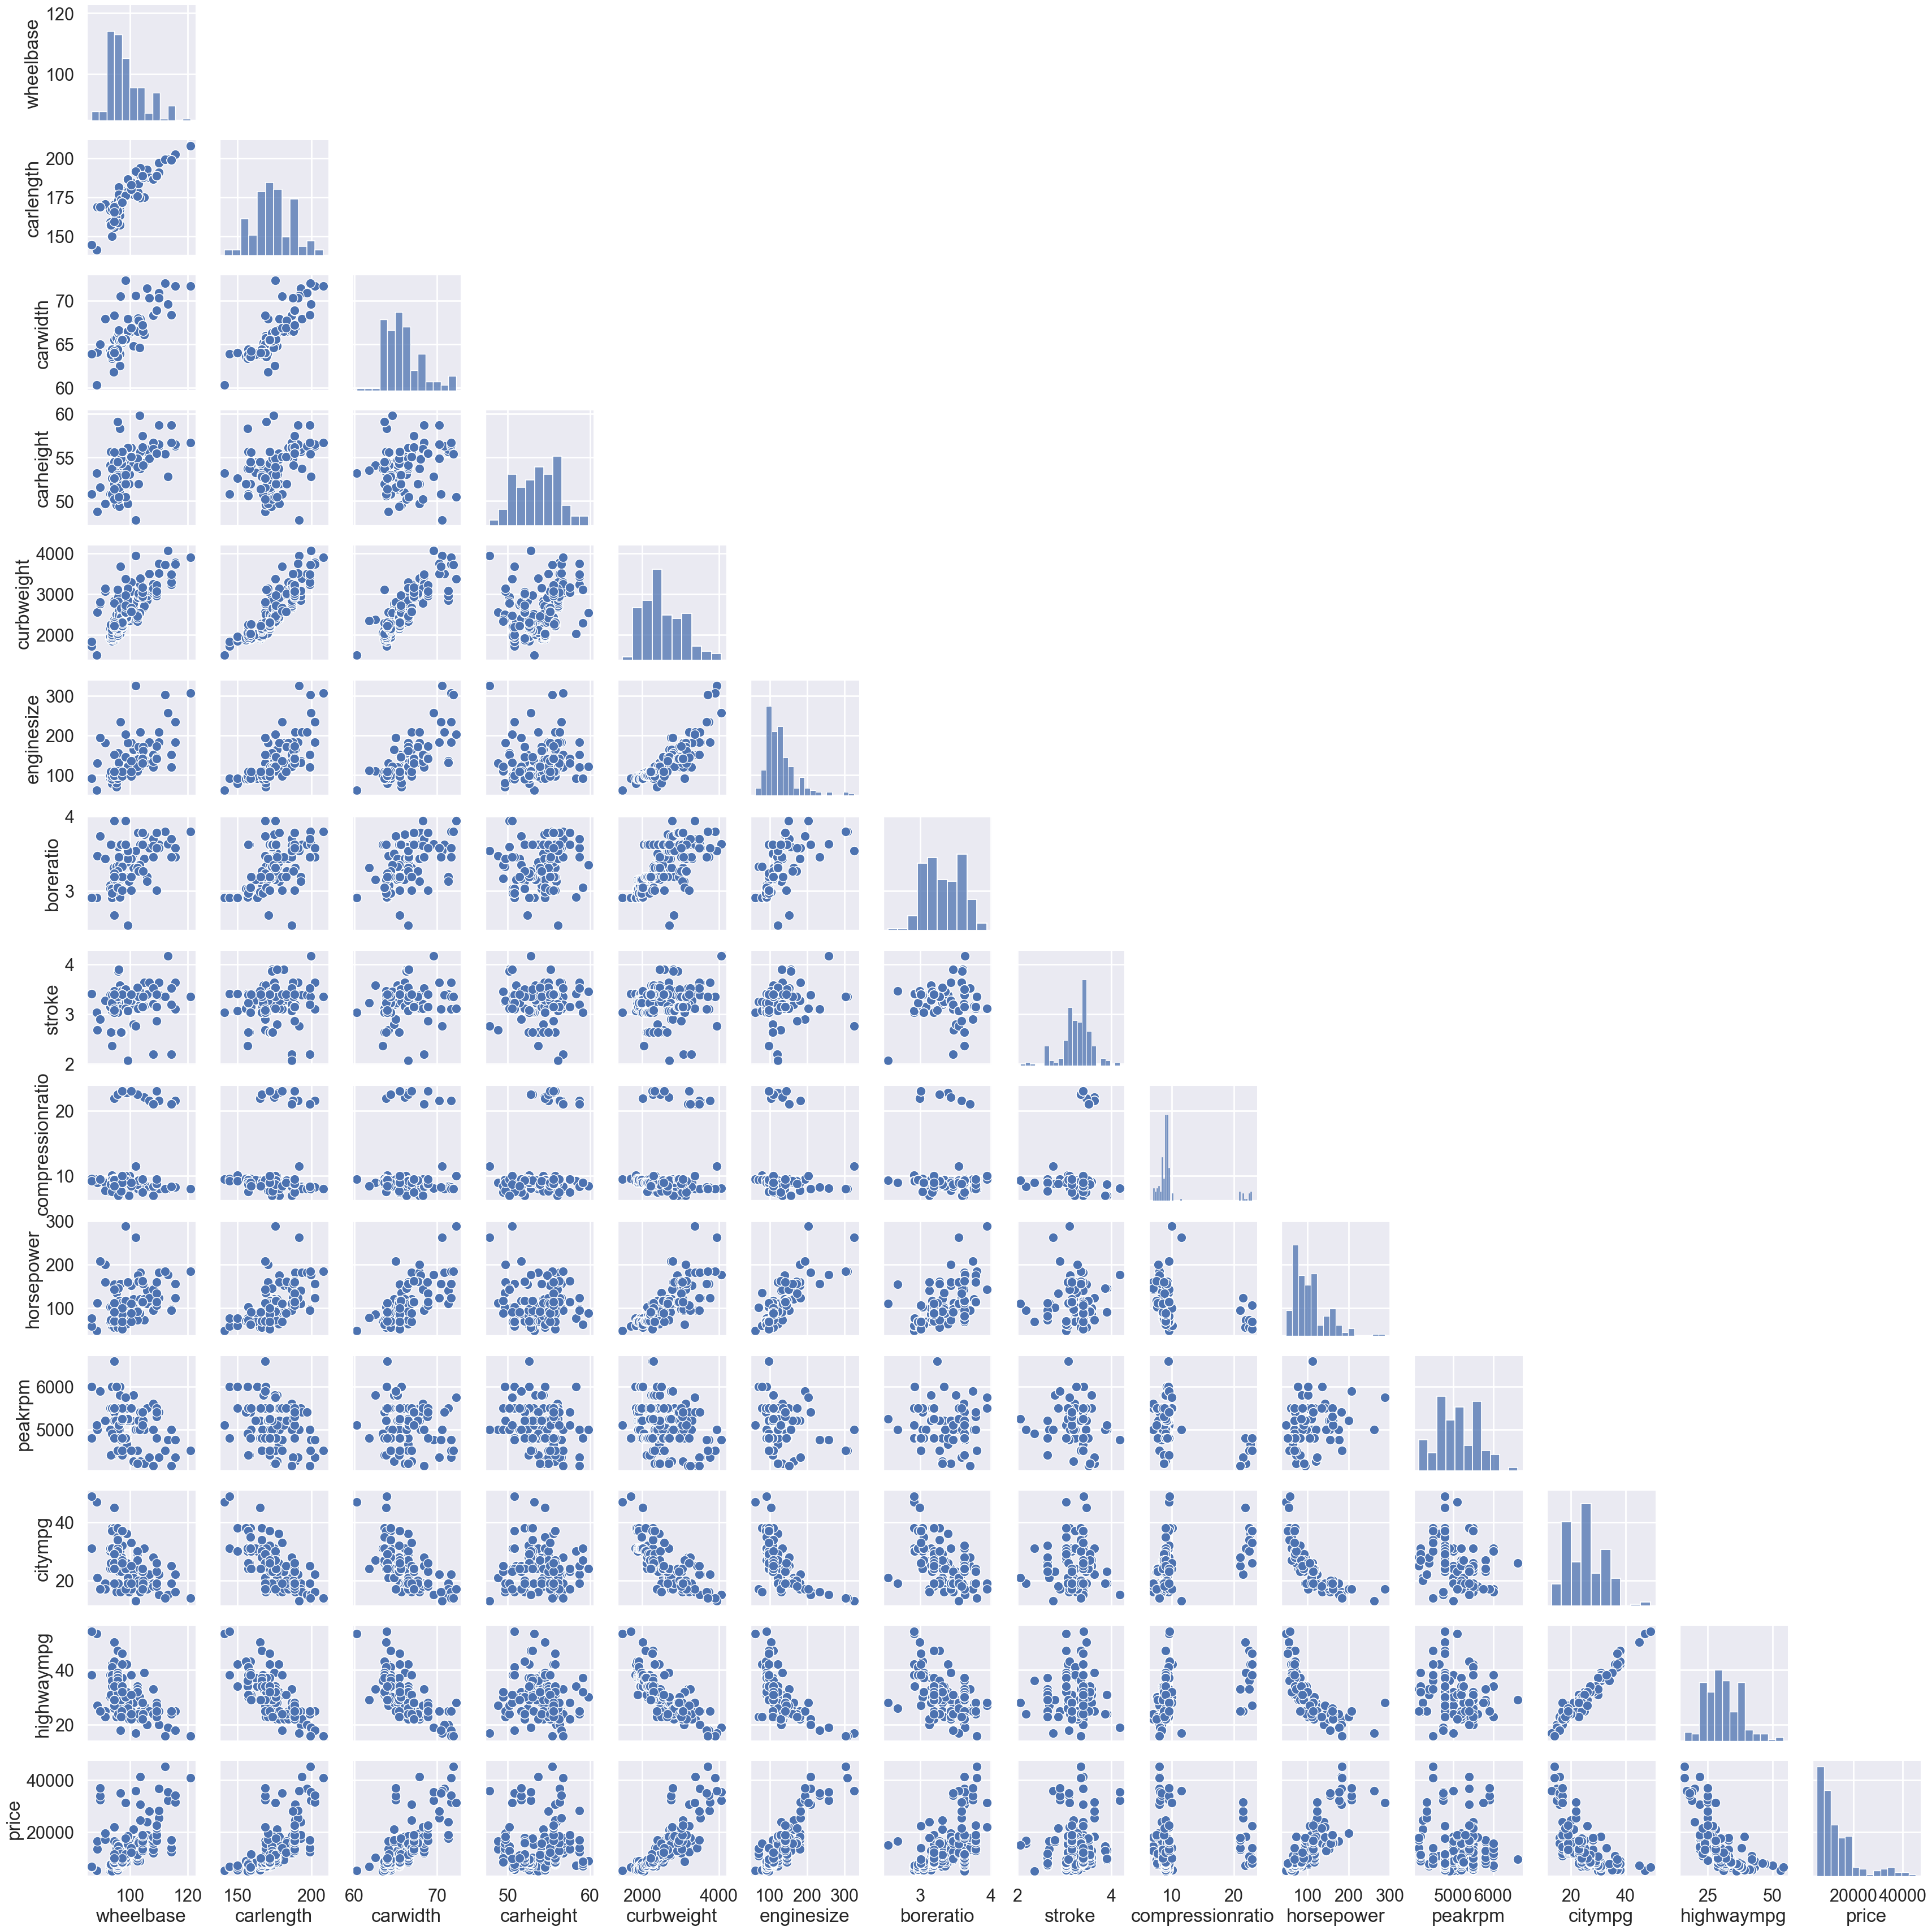

In [ ]:
# Visualize the relationship between the features and the target variable using pairplot

selected_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
                     'peakrpm', 'citympg', 'highwaympg','price']

# Add 'price' to this list as it's the target variable
#selected_features.append('price')

# Plotting
sns.set(rc={'figure.figsize':(12,8.279)})
sns.set_context("poster")
pair_plot=sns.pairplot(car_data[selected_features])

# Create a mask for the upper triangle
for i in range(len(pair_plot.axes)):  # Loop through rows (i)
    for j in range(i+1, len(pair_plot.axes)):  # Loop through columns (j), starting from i+1
        pair_plot.axes[i, j].set_visible(False)  # Hide upper triangle

        
plt.show()

<a id="c.4"></a>
## c.4 Heatmaps

<Axes: >

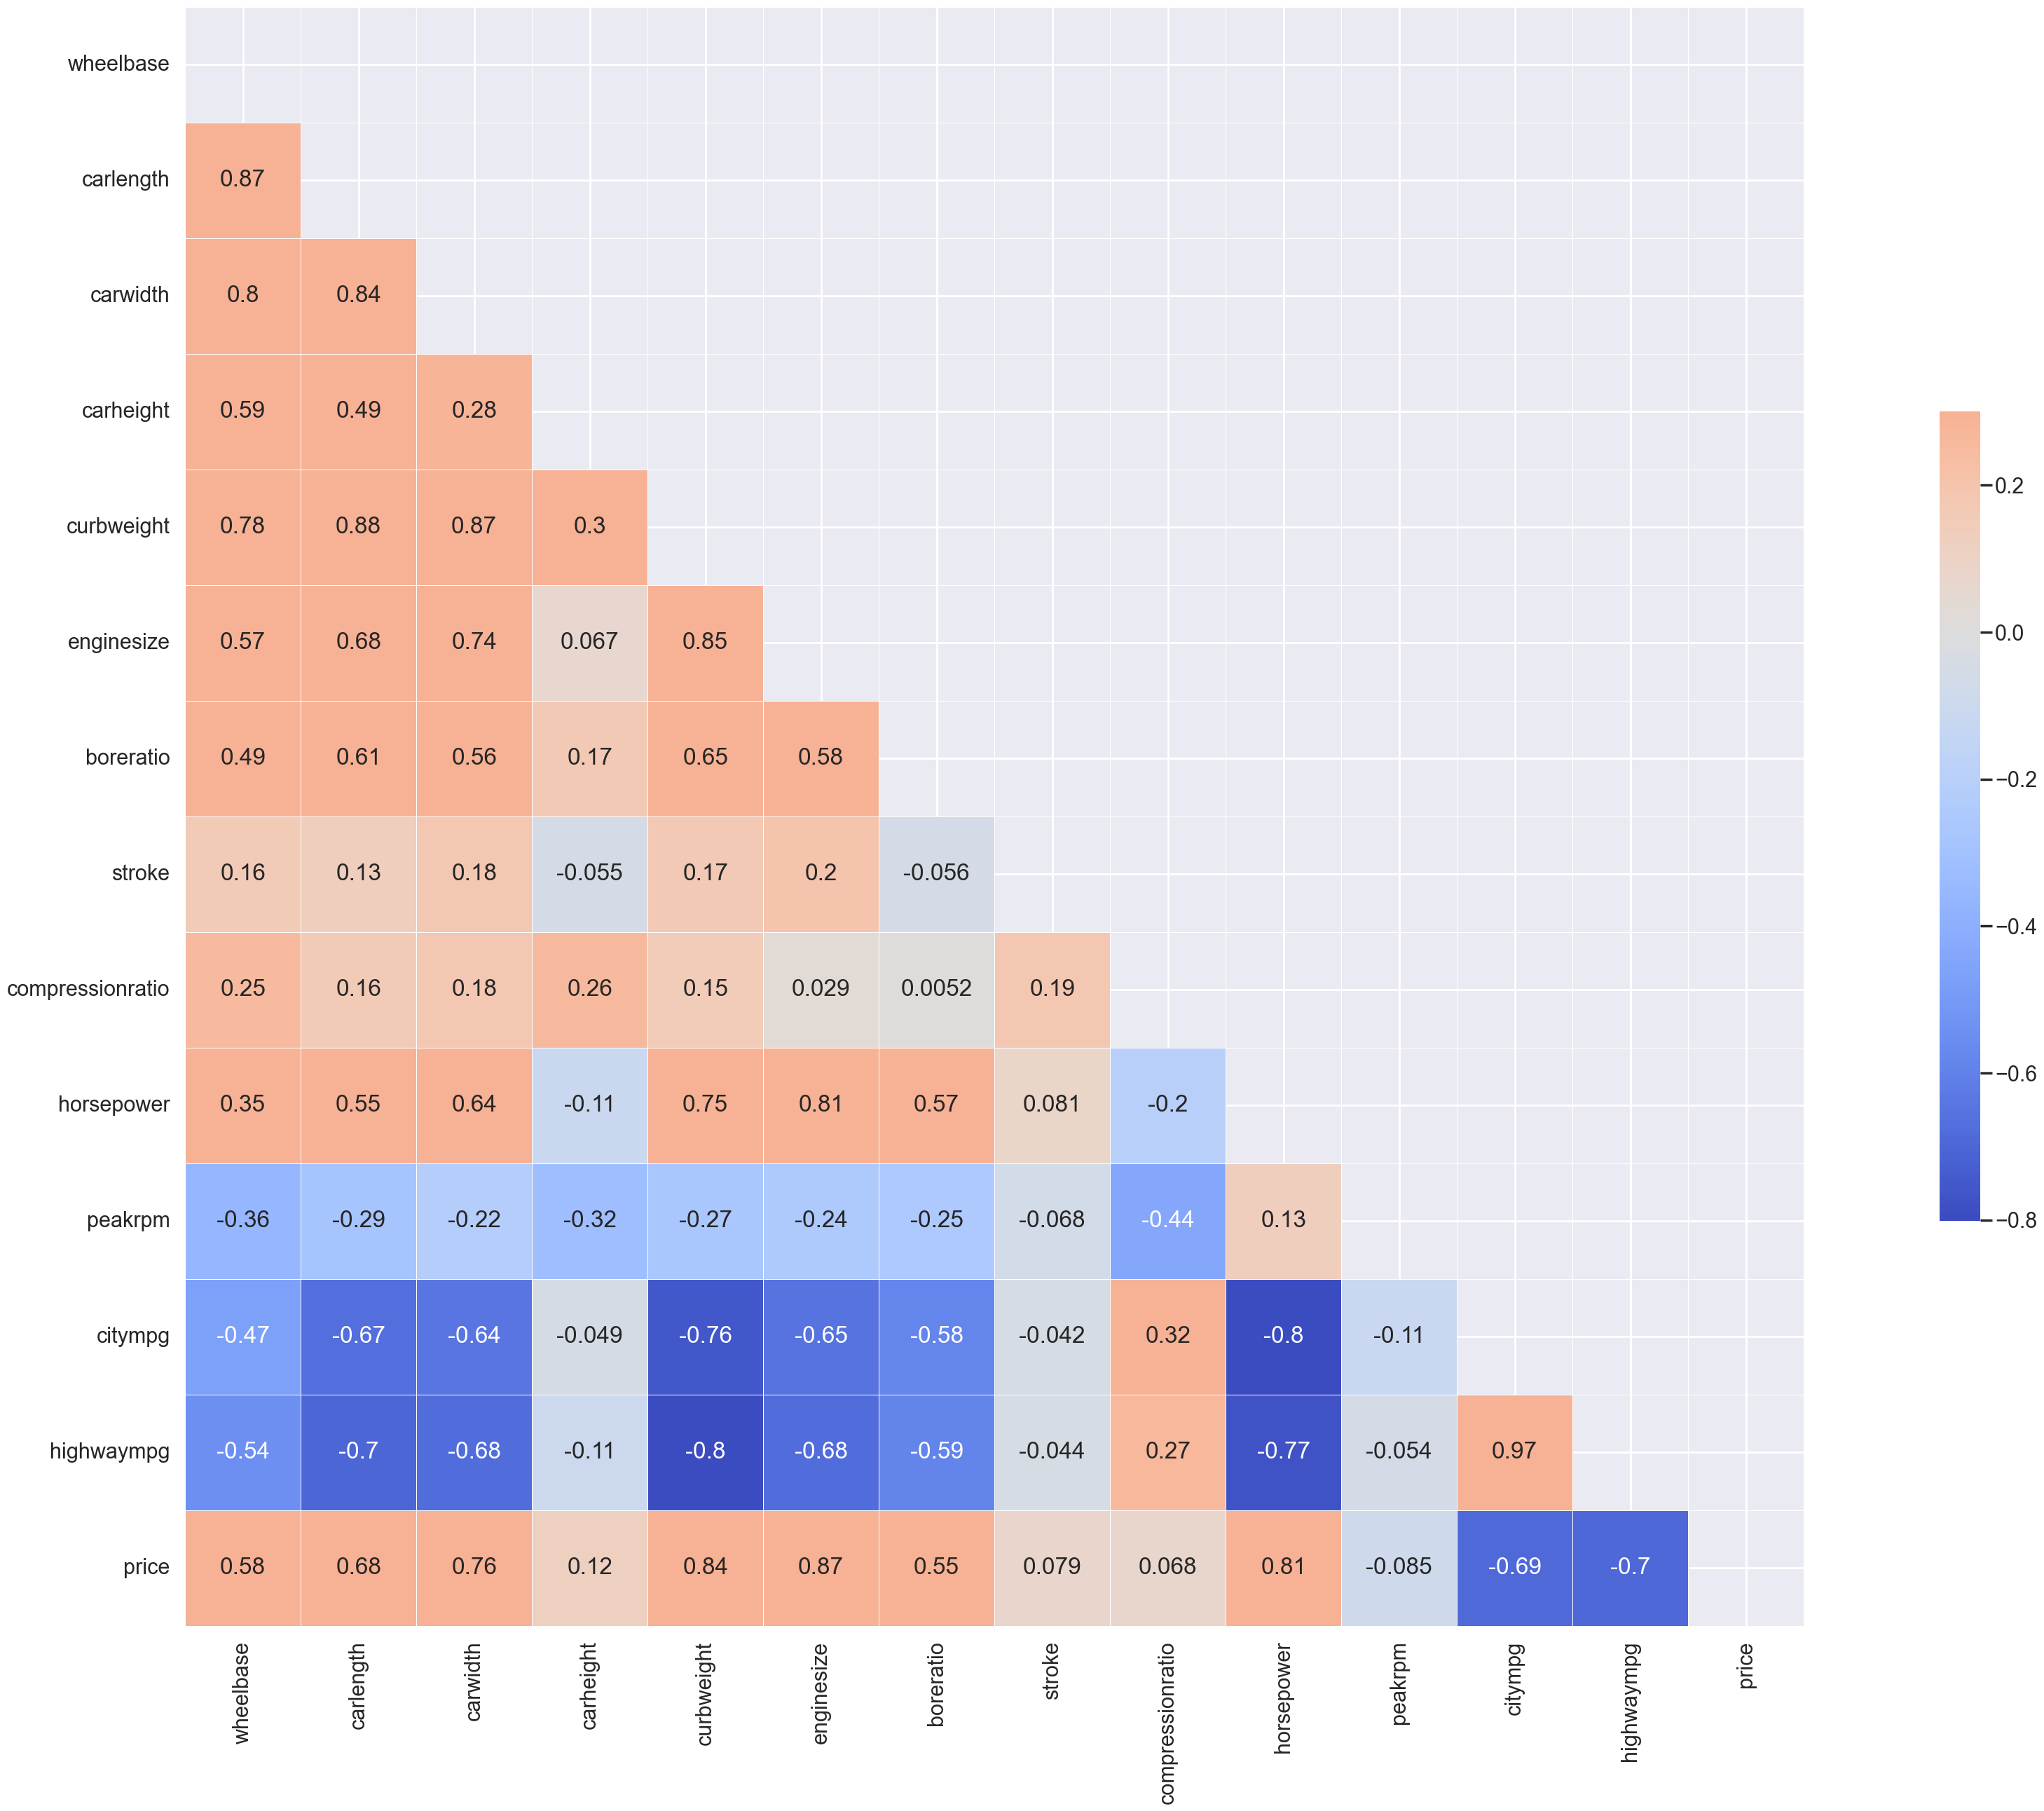

In [49]:
# Make a heatmap of the data
plt.figure(figsize=(50,30))
sns.set_context("poster")
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(car_data[selected_features].corr(), dtype=bool))
#sns.heatmap(car_data[selected_features].corr(),annot=True)

sns.heatmap(car_data[selected_features].corr(),mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

The features that have correlation to other features over 0.8 include:
wheelbase+carlength, wheelbase+carwidth,
carlength+curbweight, carlength+carwidth,
curbweight+enginesize, curbweight+highwaympg,
enginesize+hoursepower,
hoursepower+citympg,
citympg+highwaympg,

Combine wheelbase, carlength, carwidth into one feature carsize=(wheelbase+carlength+carwidth)/3. These three features individually represent different dimensions of a car's size. They are likely highly correlated as larger cars will generally have larger values for all three. It captures the overall size of the car more effectively. This reduces multicollinearity (where one variable can predict another) and simplifies the model without losing much information.

Combine citympg, highwaympg, curbweight into one feature fuelefficiency=(citympg+highwaympg)/curbweight. Both citympg and highwaympg are measures of fuel efficiency, but they might vary independently to some extent. Curbweight is also related to fuel efficiency as heavier cars typically consume more fuel. It creates a more comprehensive metric of fuel efficiency that accounts for both types of mileage and the car's weight. This singular metric might be more predictive and less noisy than considering each individually.

Combine enginesize and horsepower into one feature carpower=(enginesize+horsepower)/2. Engine size and horsepower are measures of a car's power and performance. Larger engines typically provide more horsepower, but the relationship isn't always linear. It creates a more robust measure of the car's overall power. This could help in reducing the features while still capturing the essence of the car's performance capabilities.

The features that have correlation coefficient to price over 0.8 include:
curbweight, enginesize, horsepower
Due to the combination of features above, curbweight is represented by fuelefficiency, enginesize and horsepower is represented by carpower.

The overall rationale behind combining these features is to reduce the number of variables (thus simplifying the model), reduce multicollinearity (which can skew results and make models unstable), and to create new features that might have a more straightforward or stronger relationship with the target variable (in this case, the price of the car). These engineered features are expected to retain most of the predictive power of the original set of features but in a more condensed form. This can lead to models that are easier to understand and work with, and potentially even improve performance by reducing overfitting and noise in the data.

<a id="c.5"></a>
## c.5 Feature Engineering

In [56]:
# Create the 'carsize' feature
car_data['carsize'] = (car_data['wheelbase'] + car_data['carlength'] + car_data['carwidth']) / 3

# Create the 'fuelefficiency' feature
car_data['fuelefficiency'] = (car_data['citympg'] + car_data['highwaympg'])/car_data['curbweight']

# Create the 'carpower' feature
car_data['carpower'] = (car_data['enginesize'] + car_data['horsepower']) / 2

# Drop the following columns
car_data_updated=car_data.drop(columns=['wheelbase','carlength','carwidth','curbweight','citympg','highwaympg','horsepower','enginesize'])
car_data_updated_1=car_data_updated
# Display the first few rows of the dataframe to verify the features
print(car_data_updated.head())


   car_ID  symboling fueltype aspiration doornumber      carbody drivewheel   
0       1          3      gas        std        two  convertible        rwd  \
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  carheight enginetype  ... fuelsystem boreratio  stroke   
0          front       48.8       dohc  ...       mpfi      3.47    2.68  \
1          front       48.8       dohc  ...       mpfi      3.47    2.68   
2          front       52.4       ohcv  ...       mpfi      2.68    3.47   
3          front       54.3        ohc  ...       mpfi      3.19    3.40   
4          front       54.3        ohc  ...       mpfi      3.19    3.40   

   compressionratio  peakrpm    price  CompanyName     carsize   
0 

<a id="c.6"></a>
## c.6 Brand Segmentation

In [51]:
#Apply k-mean clusters

from sklearn.cluster import KMeans


# New set of features to be used for clustering
new_features = ['price', 'carsize', 'fuelefficiency', 'carpower']

# Normalize the new features
X_new = car_data_updated[new_features]
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# Using the Elbow method to find a good number of clusters (k) with the updated data
inertias_new = []
for k in range(1, 6):  # Test 1 through 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_new)
    inertias_new.append(kmeans.inertia_)

# Find the elbow point with the updated data
k_optimal_new = np.argmax(np.diff(inertias_new)) + 1  # +1 because index starts at 0

# Run K-Means with the optimal number of clusters on the updated data
kmeans_new = KMeans(n_clusters=k_optimal_new, random_state=42)
kmeans_new.fit(X_scaled_new)
clusters_new = kmeans_new.labels_

# Attaching the new cluster labels to the updated data
car_data_updated['cluster'] = clusters_new

# Calculating the mean values for each cluster with the updated data
cluster_summary_new = car_data_updated.groupby('cluster')[new_features].mean()

cluster_summary_new, k_optimal_new

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

(                price     carsize  fuelefficiency    carpower
 cluster                                                      
 0        10193.527027  111.487838        0.023494  102.601351
 1        35662.633333  121.308889        0.010847  212.900000
 2        17258.445361  118.439344        0.015235  138.795082
 3         6903.636364  106.380000        0.036617   80.500000,
 4)

These summaries provide insights into the different market segments identified through the clustering process. The clusters range from economy and compact cars to luxury and performance vehicles, each with its distinct combination of price, size, fuel efficiency, and power. Comparing these clusters to the brand groupings can find correlations to deepen the understanding of market positioning and product offerings of different car brands. 

In [52]:
# Position every brands to these clusters

# Counting the number of cars each brand has in each cluster
brand_cluster_distribution = car_data_updated.groupby(['CompanyName', 'cluster']).size().unstack(fill_value=0)

# For better understanding, let's convert counts to percentages of total cars for each brand
brand_cluster_percentage = brand_cluster_distribution.div(brand_cluster_distribution.sum(axis=1), axis=0) * 100

# Display the brand distribution across clusters as percentages
brand_cluster_percentage


cluster               0      1           2           3
CompanyName                                           
alfa-romero   66.666667    0.0   33.333333    0.000000
audi          14.285714    0.0   85.714286    0.000000
bmw           25.000000   37.5   37.500000    0.000000
buick          0.000000   62.5   37.500000    0.000000
chevrolet      0.000000    0.0    0.000000  100.000000
dodge         33.333333    0.0   11.111111   55.555556
honda         46.153846    0.0    0.000000   53.846154
isuzu         50.000000    0.0    0.000000   50.000000
jaguar         0.000000  100.0    0.000000    0.000000
mazda         64.705882    0.0    5.882353   29.411765
mercury        0.000000    0.0  100.000000    0.000000
mitsubishi    53.846154    0.0   23.076923   23.076923
nissan        11.111111    0.0   33.333333   55.555556
peugeot        0.000000    0.0  100.000000    0.000000
plymouth      28.571429    0.0   14.285714   57.142857
porsche        0.000000   80.0   20.000000    0.000000
renault      100.000000    0.0    0.000000    0.000000
saab           0.000000    0.0  100.000000    0.000000
subaru        75.000000    0.0    0.000000   25.000000
toyota        53.125000    0.0   15.625000   31.250000
volkswagen    66.666667    0.0    8.333333   25.000000
volvo          0.000000    0.0  100.000000    0.000000

Cluster 0: Mid-range, Balanced Features

Alfa-Romero, Dodge, Honda, Isuzu, Mazda, Nissan, Plymouth, Subaru, Toyota, and Volkswagen have a significant presence here, indicating a range of mid-range vehicles.

Cluster 1: High-End Luxury & Performance

Jaguar, Porsche, and Mercury are predominantly found in this cluster, suggesting a focus on luxury or high-performance vehicles.

Cluster 2: Premium & Advanced Features

Audi, BMW, Buick, Mazda, Mitsubishi, Peugeot, Saab, and Volvo have notable representation, indicating offerings in premium segments with advanced features.

Cluster 3: Economy & Compact Cars

Chevrolet, Dodge, Honda, Isuzu, Nissan, Plymouth, Subaru, Toyota, and Volkswagen show a notable presence, suggesting a focus on more compact and economy-oriented vehicles.

Overall, the brands that spread across multiple clusters indicating a diverse range of offerings. 

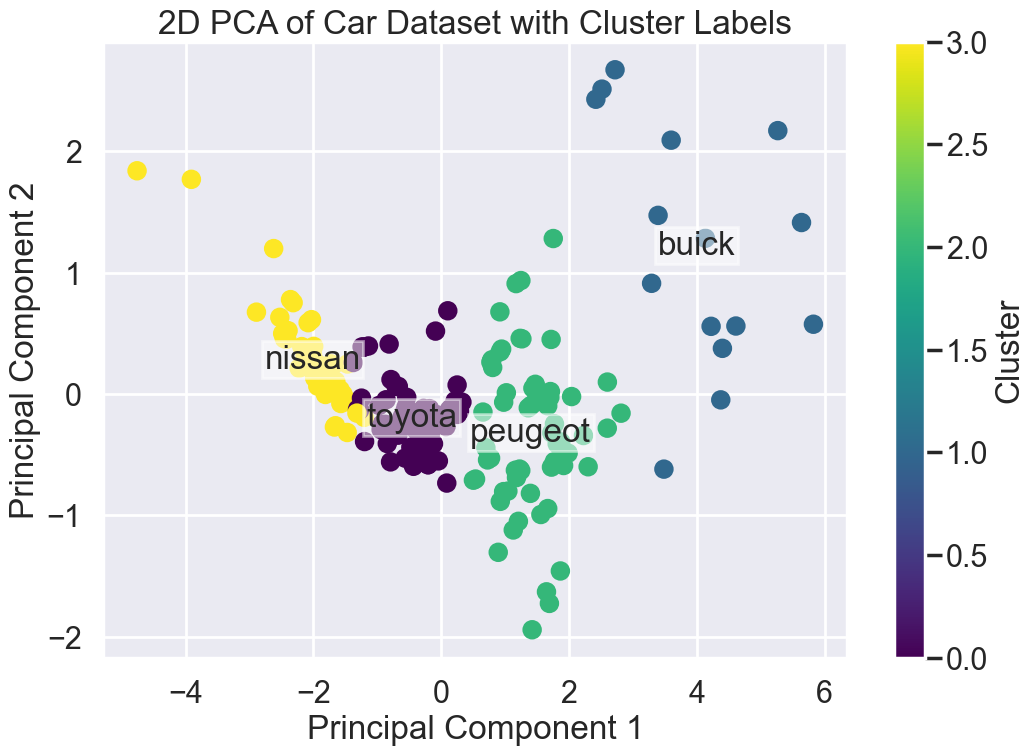

In [53]:
#PCA Plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for 2D plotting
X_pca = pca.fit_transform(X_scaled_new)

# Step 2: Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_new, cmap='viridis', marker='o')

# Step 3: Labeling Clusters with Brand names
# Calculate the centroid of each cluster in the PCA reduced space
centroids_pca = pca.transform(kmeans_new.cluster_centers_)

# Identify the most representative brand for each cluster
for i, center in enumerate(centroids_pca):
    # Find the brands most common in this cluster
    brands_in_cluster = car_data_updated[car_data_updated['cluster'] == i]['CompanyName']
    most_common_brand = brands_in_cluster.mode()[0]
    
    # Place a label at the centroid position
    plt.text(center[0], center[1], most_common_brand, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.5, pad=2))

# Enhancing the plot
plt.title('2D PCA of Car Dataset with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Here is a 2D scatter plot of the car dataset after applying PCA for dimensionality reduction. Each point represents a car, colored according to its cluster assignment. The labels on the plot represent the most common brand in each cluster, positioned at the centroid of each cluster in the reduced space.

Summary

This EDA section created the feature comparison for each brand. It then uses boxplot, pairplot, and heatmap to explore the relationship among features and carprice. Then in feature engineering, certain features are combined and eliminated to prepare for the preprocessing. Kmean algorithm is used to segment features into 4 clusters. Different car brands are assigned to each cluster. 

In [57]:
%store car_data_updated
%store categorical_columns
%store numerical_columns
%store car_data
%store car_data_updated_1

Stored 'car_data_updated' (DataFrame)
Stored 'categorical_columns' (list)
Stored 'numerical_columns' (list)
Stored 'car_data' (DataFrame)
Stored 'car_data_updated_1' (DataFrame)


In [55]:
car_data_updated.shape

(205, 22)